In [ ]:
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
from google.colab import files


In [ ]:

def fetch_multiple_stocks(symbols, period="5y"):
    """
    Downloads multiple stock data using yfinance.
    symbols: dictionary with { "StockName": "Ticker" }
    Returns: DataFrame with Close prices of all stocks
    """
    all_data = pd.DataFrame()

    for name, ticker in symbols.items():
        print(f"⏳ Fetching {name} ({ticker}) ...")
        df = yf.download(ticker, period=period)
        if df.empty:
            print(f"⚠️ No data found for {ticker}")
            continue

        # Keep only 'Close' price
        df = df[['Close']].rename(columns={'Close': name})

        # Merge into one dataframe
        if all_data.empty:
            all_data = df
        else:
            all_data = all_data.join(df, how="outer")

    # Preprocessing: fill missing values
    all_data = all_data.fillna(method="ffill").dropna()

    # Save to CSV
    filename = "Multiple_Stocks.csv"
    all_data.to_csv(filename)
    files.download(filename)

    print(f"✅ All stock data saved as {filename}")
    return all_data


In [ ]:
# Dictionary of stock names & tickers (NSE = .NS, BSE = .BO)
stock_symbols = {
    "Reliance_NSE": "RELIANCE.NS",
    "TCS_NSE": "TCS.NS",
    "Infosys_NSE": "INFY.NS",
    "SBI_BSE": "SBIN.BO",
    "HDFC_Bank_BSE": "HDFCBANK.BO"
}


In [ ]:
all_stocks_df = fetch_multiple_stocks(stock_symbols, period="5y")
all_stocks_df.head()



⏳ Fetching Reliance_NSE (RELIANCE.NS) ...


/tmp/ipython-input-4168555208.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4168555208.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period)


⏳ Fetching TCS_NSE (TCS.NS) ...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4168555208.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period)


⏳ Fetching Infosys_NSE (INFY.NS) ...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4168555208.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period)


⏳ Fetching SBI_BSE (SBIN.BO) ...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4168555208.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period)


⏳ Fetching HDFC_Bank_BSE (HDFCBANK.BO) ...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4168555208.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_data = all_data.fillna(method="ffill").dropna()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ All stock data saved as Multiple_Stocks.csv


Price,Reliance_NSE,TCS_NSE,Infosys_NSE,SBI_BSE,HDFC_Bank_BSE
Ticker,RELIANCE.NS,TCS.NS,INFY.NS,SBIN.BO,HDFCBANK.BO
Date,,,,,
2020-08-19,966.511353,2098.343750,853.155762,180.214127,1011.026978
2020-08-20,950.868042,2094.856934,849.465088,178.019745,1002.691711
2020-08-21,943.975891,2090.904297,843.817627,181.357056,1028.360352
2020-08-24,950.278625,2090.439941,842.572449,184.145737,1057.817993
2020-08-25,944.089233,2085.371826,834.301514,190.180298,1060.706787


/tmp/ipython-input-93902801.py:5: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(all_stocks_df.index, all_stocks_df[col], label=col)


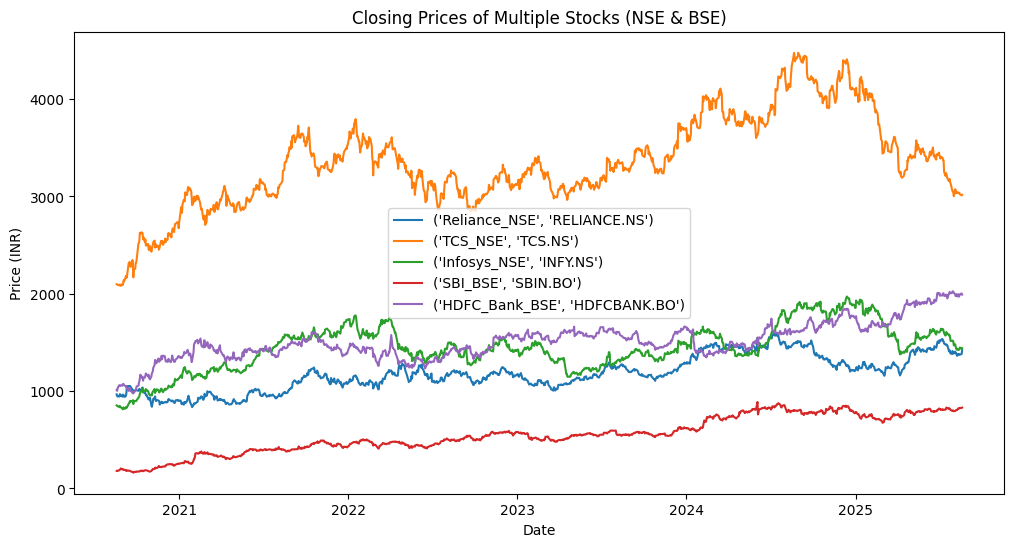

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for col in all_stocks_df.columns:
    plt.plot(all_stocks_df.index, all_stocks_df[col], label=col)

plt.title("Closing Prices of Multiple Stocks (NSE & BSE)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.show()

